# Deep Learning ISD

## Sommaire:
* [1. Auteurs et liens](#1.-Auteurs-et-liens)
* [2. Introduction](#2.-Introduction)
* [3. Aspects Théoriques](#3.-Aspects-Théoriques)
* [4. Détails de l'implémentation](#4.-Détails-de-l'implémentation)
    * [4.1 Set de données](#4.1-Set-de-données)
    * [4.2 Modularité](#4.2-Modularité)
    * [4.3 LoadData](#4.3-LoadData)
    * [4.4 Functions](#4.4-Functions)
    * [4.5 Layers](#4.5-Layers)
    * [4.6 NeuralNetwork](#4.6-NeuralNetwork)
    * [4.7 Trainer](#4.7-Trainer)
    * [4.7 Utilities](#4.8-Utilities)
* [5. Démonstration](#5.-Démonstration)
    * [5.1 Entrainement et Test sur mini-batch](#5.1-Entrainement-et-Test-sur-mini\-batch)
    * [5.2 Entrainement sur mini-batch, Test sur tout le data-set](#5.2-Entrainement-sur-mini-batch,-Test-sur-tout-le-data\-set)
* [6. Exemple concret](#6.-Exemple-concret)
* [7. Applications](#7.-Applications)
* [8. Ouverture et extensions possibles](#8.-Ouverture-et-extensions-possibles)

## 1. Auteurs et liens

| Nom  | Prénom | Courriel | Groupe | Github |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
| AIT BELKACEM  | Moncef Karim  | moncef.ait-belkacem@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/MK8BK">MK8BK</a>|
| Tran--Guery | Thimoté | thimote.tran--guery@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/Thimote91">Thimote91</a>|

[Repositoire GitHub du projet](https://github.com/MK8BK/Deep_Learning_ISD)

## 2. Introduction
Ceci est le projet final de l'UE <a href="https://nicolas.thiery.name/Enseignement/IntroScienceDonnees/">Initiation à la Science des Données</a> offert en L1-S2 à l'Université Paris-Saclay.

Il s'agit d'un classificateur de caractères hexadécimaux manuscrits en python.

Plus précisément, c’est une implémentation d’un réseau neuronal, visant la prédiction de caractères manuscrits de `0-9/A-F` (16 classes),

dans le data set `EMNIST`.

On utilise pour cela le module de calcul numérique `numpy`, le module de visualisation `matplotlib` et le module de traitement d'image `PIL`.

(En outre des modules suivants de la librairie standard python : `os`, `random`, `pickle`, `typing`)

## 3. Aspects Théoriques 

draft, en cours de remplissage, manque contenu, phrase pas revisee, accents et fautes osef

**Reseaux neuronaux simples et Deep learning:**

Soit une image de monochrome de $ 28\times28 $  pixels (channel unique). 

On represente cette image comme un element de l'ensemble $[0,1]^{28\times28}$, soit un 784-uplet de valeurs dans $[0,1]$. 

C'est un applatissement de l'image sous forme de vecteur ligne (ou colonne). 

On effectue biensur une normalisation en divisant par 255, ce qui borne bien la valeur de chaque pixel entre 0 et 1.

L'image represente au plus un element de l'ensemble des caracteres hexadecimaux : 

$\{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, A, B, C, D, E, F\} = C$

On dit que ces 16 elements sont les classes du probleme.

On suppose qu'il existe une application $f: [0,1]^{784}\longrightarrow C $ .

Un reseau neuronal est en fait une approximation de $f$.


**Architecture d'un reseau de Deep Learning**

**Le neurone**

<img src="./docs/illustrations/neurone.png" width=400 style="float: right"/>

La structure principale a bien maitriser est le neurone.

Un neurone est une composition de fonctions lineaires et non lineaires.

Les fonctions lineaires ne sont rien d'autre que des combinaisons lineaires des variables $x_i$, ainsi que l'addition d'un bias $b$.

Les coefficients $w_i$ sont appellees les poids du neurone. 

Le resultat de cette somme ponderee et addition est alors passee en parametre a une fonction non lineaire dite d'activation.

Il est necessaire que cette fonction ne soit pas lineaire, car autrement on ne pourrait approximer que des fonctions lineaires.



<img src="./docs/illustrations/nn.png" width=500 style="float: left" />



Voici une architecture standard d'un reseau de Deep learning.

Chaque noeud du graphe est un neurone.

Chaque trait reliant deux neurones est un poids $w_i$.

A chaque neurone on associe un nombre : le biais $b$.

Un lot de neurone (disposee verticalement sur cette illustration) est appelle une couche. 

Chaque neurone est entierement connecte aux neurons de la couche precedente.

Un neurone de la couche suivante recoit un nombre par neurone, ce sont ses $x_i$ a lui.

Cette operation s'appelle la forward propagation.

L'idee

Points utiles

## 4. Détails de l'implémentation 

L'outil principal à notre disposition est l'objet np.array du module `numpy` .

Toute référence au mot matrice est en fait un 2d np.array (np.matrix ne se prête pas à la tâche) .


### 4.1 Set de données

On dispose de `38400` images, reparties en `16` classes, soit `2400` images par classe.

Chaque image est au format `jpeg`.

Ces fichiers sont dans le dossier `./EMNIST_DATA_SET/{classe de l'image}/{nom de l'image}.jpeg`.

De plus chaque image contient sa classe en premier caractère.


<img src="./EMNIST_DATA_SET/0/0_char_102479.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/1/1_char_16442.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/2/2_char_7136.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/3/3_char_55992.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/4/4_char_80661.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/5/5_char_73026.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/6/6_char_19045.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/7/7_char_107973.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/8/8_char_22810.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/9/9_char_110343.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/A/A_char_4502.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/B/B_char_9251.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/C/C_char_15156.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/D/D_char_35808.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/E/E_char_712.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/F/F_char_99118.jpeg" width=56 style="float: left"/>
<div style="clear: both"></div>

Par exemple : `./EMNIST_DATA_SET/0/0_char_102479.jpeg` est le path vers la première image (celle du 0)

### 4.2 Modularité

Notre implémentation de Deep Learning se décompose en 6 fichiers situes dans le dossier `./src/` :
 - `LoadData.py`
 - `Functions.py`
 - `Layers.py`
 - `NeuralNetwork.py`
 - `Trainer.py`
 - `Utilities.py`

Importons ces six fichiers :

In [2]:
from src.LoadData import *
from src.Functions import *
from src.Layers import *
from src.NeuralNetwork import *
from src.Trainer import *
from src.Utilities import *

Utilisons la fonction `show_source()` définie dans `./src/Utilities.py` afin d'observer en détails les objets qui seront manipulés par la suite.

### 4.3 `LoadData`

In [2]:
#Global list[str] of classes(single characters)
print(CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']


In [3]:
help(char_to_label)

Help on function char_to_label in module src.LoadData:

char_to_label(character: str) -> int
    Convert the character representation of the class into its integer representation
    @param: character: str , has to be in the global defined classes
    @return: the integer representation of said character



In [4]:
help(label_to_char)

Help on function label_to_char in module src.LoadData:

label_to_char(label: int) -> str
    Convert the integer representation of the class into its character representation
    @param: label: int , has to be a valid index of the global defined classes
    @return: the character representation of said integer



In [5]:
help(load_pil_image)

Help on function load_pil_image in module src.LoadData:

load_pil_image(str_path: str) -> <module 'PIL.Image' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\PIL\\Image.py'>
    Returns a grayscale PIL image given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a PIL Image object (single channel: grayscale)



In [6]:
help(load_numpy_image)

Help on function load_numpy_image in module src.LoadData:

load_numpy_image(str_path: str) -> <built-in function array>
    Returns the flattened numpy representation of an image 
                        given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a normalized np.array of dimensions (h*w,1)



In [7]:
help(make_input_matrix)

Help on function make_input_matrix in module src.LoadData:

make_input_matrix(samples: list) -> <built-in function array>
    Returns the matrix representation of s samples
    @param: samples: a list of flattened np.array 's, 
                    each representing a sample image
    @return: input_matrix: a matrix (2d np.array) containing one sample per column,
                                     1 feature(pixel value) per row



In [8]:
help(make_labels)

Help on function make_labels in module src.LoadData:

make_labels(filenames: list) -> <built-in function array>
    Returns the class label for each image filename in filenames
    @param: filenames: a list of strings, relative str_paths to files
    @return: labels: a list of int labels : the class of each file



In [9]:
help(make_labels_matrix)

Help on function make_labels_matrix in module src.LoadData:

make_labels_matrix(labels: list, classes: list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']) -> <built-in function array>
    Returns the one hot encoded matrix representation of the labels, 
                        given a list of char labels
    @param: labels: a list of strings, filepaths
    @return: labels_matrix: a 2 np.array of 16 rows, each column is an image



In [10]:
help(make_random_batch)

Help on function make_random_batch in module src.LoadData:

make_random_batch(path: str, batch_size: int, classes: list, equilibrium: bool = True) -> list
    Returns a list of filenames randomly, equal per class or not
    @param: path: the path to the data_set folder
    @param: batch_size: the number of images in the batch
    @param: classes: a list of str representations of the classes
    @param: equilibrium: a bool, wether or not to equalize images per class
    @return: batch: a list of strings, 
            the paths to the randomly selected images



In [11]:
help(load_training_set)

Help on function load_training_set in module src.LoadData:

load_training_set(path_str: str, batch_size: int, classes: list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F'], equilibrium: bool = True) -> tuple
    Returns a training input and labels matrices randomly, 
                                    equal per class or not
    @param: path: the path to the data_set folder
    @param: batch_size: the number of images in the batch
    @param: classes: a list of str representations of the classes
    @param: equilibrium: a bool, wether or not to equalize images per class
    @return: batch: X: an input matrix of shape (784,batch_size) 
                    Y: a corresponding labels matrix of shape (16, batch_size)



In [12]:
help(load_prediction_image)

Help on function load_prediction_image in module src.LoadData:

load_prediction_image(path_str)
    Loads a single image located at path_str
    @param: path_str: relative path to the image
    @return: x: a 784x1 input matrix
             im: PIL representation of the image



In [13]:
help(load_data_set)

Help on function load_data_set in module src.LoadData:

load_data_set(path_str)
    Loads entire data set at path_str
    @param: path_str: root path of data_set
    @return: X: an imput matrix of shape (784, 38400)
             Y: a labels matrix of shape (16, 38400)



### 4.4 `Functions`

In [14]:
help(Activation)

Help on class Activation in module src.Functions:

class Activation(builtins.object)
 |  Activation(fn, dfn)
 |  
 |  Abstract Activation function class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn, dfn)
 |      @param: Callable self.fn: forward pass function
 |      @param: Callable self.dfn: backward pass function
 |              (derivative of forward pass function)
 |  
 |  backward(self, x)
 |      apply backward pass function to input gradient matrix(2d np.array)
 |      @param: x : 2d np.array , gradient of loss wrt layer output
 |      @return: a 2d np.array (same shape as x), elementwise evaluation using dfn
 |              ie: gradient of error wrt linear part of layer
 |  
 |  forward(self, x)
 |      apply forward pass function to input matrix (2d np.array)
 |      @param: x : a 2d np.array, the results of the linear part of the layer
 |      @return: a 2d np.array (same shape as x), elementwise evaluation using fn
 |  
 |  -------------------------------------

**Activations implémentées :**

<img src="./docs/illustrations/relu.png" width=300px style="float: left"/>
<img src="./docs/illustrations/tanh.png" width=300px style="float: left"/>
<img src="./docs/illustrations/sigmoid.png" width=300px style="float: left"/>

In [18]:
help(SoftmaxCrossEntropyLoss)

Help on class SoftmaxCrossEntropyLoss in module src.Functions:

class SoftmaxCrossEntropyLoss(builtins.object)
 |  SoftmaxCrossEntropyLoss(eps: float = 1e-09, axis=0)
 |  
 |  Softmax Cross Entropy loss function wrapper class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, eps: float = 1e-09, axis=0)
 |      @param: optional eps = 1e-9: safety pre-log clipping precision
 |      @param: optional axis = 0 (columns) 
 |                          apply softmax by columns or rows of matrix
 |  
 |  backward(self, y)
 |      return gradient of loss with respect to prediction 
 |          for Softmax Cross Entropy Loss function
 |      @param: y : 2d np.array of labels
 |      @return: softmax_preds - labels 
 |              (gradient of loss wrt linear output layer)
 |  
 |  forward(self, x)
 |      apply softmax to matrix by axis (0 columns; 1 rows)
 |      @param: x : a 2d np.array, the results of the linear part of the layer
 |      @return: self.p (cached for backward use), axis-wi

In [19]:
help(compute_cost)

Help on function compute_cost in module src.Functions:

compute_cost(p, y, eps=1e-09)
    Compute cost using Cross Entropy loss function
    @param: p : np.array of shape (16, batch_size),
             column wise probabilities per sample
    @param: y : one hot encoded np.array of labels
    @return: loss (float)



In [20]:
help(predicted_labels)

Help on function predicted_labels in module src.Functions:

predicted_labels(p)
    Converts a columnwise matrix of probabilities into prediction labels
    @param: p : np.array of shape (16, batch_size), sum(column)=1
    @return: a list characters, predictions based on max probability per image



In [21]:
help(percent_good)

Help on function percent_good in module src.Functions:

percent_good(p, y)
    Returns a percentage (range 0 to 100 float) of good predictions
    @param: p : np.array of shape (16, batch_size), sum(column)=1
    @param: y : np.array of shape (16, batch_size), one-hot-encoded
    @return: accuracy : a float between 0 and 100,
            the percentage of good predictions



### 4.5 `Layers`

In [22]:
help(DenseLinearLayer)

Help on class DenseLinearLayer in module src.Layers:

class DenseLinearLayer(builtins.object)
 |  DenseLinearLayer(N, F)
 |  
 |  DenseLinearLayer wrapper class
 |      Fully connected, unactivated layer
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, F)
 |      Constructor uses glorot initialisation
 |      @param: N : int, number of neurons
 |      @param: F : int, number of input features 
 |                  (neurons in previous layer)
 |  
 |  backward(self, dZ, lr)
 |      Performs the backward pass given gradient matrix
 |      @param: dZ : an np.array of shape (N, batch_size)
 |      @action: updates self.W and self.B using SGD
 |      @return: dX : gradient of error wrt previous layer
 |              shape (F, batch_size)
 |  
 |  forward(self, X)
 |      Performs WX+B given input matrix
 |      @param: X : an np.array of shape (F, batch_size)
 |      @return: Z (cached for backward pass), weights*inputs + biases
 |  
 |  ---------------------------------------------

In [23]:
help(DenseActivatedLayer)

Help on class DenseActivatedLayer in module src.Layers:

class DenseActivatedLayer(DenseLinearLayer)
 |  DenseActivatedLayer(N, F, A)
 |  
 |  Child of DenseLinearLayer, uses an activation function (R->R)
 |  
 |  Method resolution order:
 |      DenseActivatedLayer
 |      DenseLinearLayer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, F, A)
 |      Constructor, uses DenseLinearLayer constructor
 |          declares A, activation function for layer instance
 |      @param: N : int, number of neurons
 |      @param: F : int, number of input features 
 |                  (neurons in previous layer)
 |      @param: A : activation function, 
 |                  instance of src.Functions.Activation
 |  
 |  backward(self, dA_of_Z: <built-in function array>, lr) -> <built-in function array>
 |      Performs the backward pass given gradient matrix
 |      @param: dA_of_Z : an np.array of shape (N, batch_size)
 |      @action: elementwise activation.backward

In [24]:
help(OutputLayer)

Help on class OutputLayer in module src.Layers:

class OutputLayer(DenseLinearLayer)
 |  OutputLayer(N, F, C)
 |  
 |  Method resolution order:
 |      OutputLayer
 |      DenseLinearLayer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, F, C)
 |      Constructor, uses DenseLinearLayer constructor
 |          declares C, combined cost and activation function for layer
 |      @param: N : int, number of neurons (same as number of classes)
 |      @param: F : int, number of input features
 |                  (neurons in previous layer)
 |      @param: C : cost and activation function, 
 |                  Only implemented SoftmaxCrossEntropy for now (works best)
 |  
 |  backward(self, Y, lr)
 |      Performs the backward pass given labels matrix
 |      @param: Y : an np.array of shape (N, batch_size)
 |      @action: loss/cost function.backward(Y)
 |      @action: updates self.W and self.B using super().backward(dZ)
 |      @return: dX : gradient of err

### 4.6 `NeuralNetwork`

In [25]:
help(NeuralNetwork)

Help on class NeuralNetwork in module src.NeuralNetwork:

class NeuralNetwork(builtins.object)
 |  NeuralNetwork(layers)
 |  
 |  The NeuralNetwork wrapper class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, layers)
 |      @param: layers : list[DenseLinearLayer]
 |          ordered, last must be OutputLayer
 |  
 |  backward(self, Y, lr=0.01)
 |      Backward pass of neural network
 |      @param: Y : a 2d np.array of shape (16, batch_size)
 |      @param: Optional lr=0.01 : Learning rate
 |      @action: perform backpropagation, use ____Layer.backward
 |              successively
 |      @return: None
 |  
 |  forward(self, X)
 |      Forward pass of neural network
 |      @param: X : a 2d np.array of shape (784, batch_size)
 |      @return: res : model prediction: of shape (16, batch_size)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)

### 4.7 `Trainer`

In [3]:
help(train_on_subset)

Help on function train_on_subset in module src.Trainer:

train_on_subset(net, path_str, epochs, batch_size, equilibrium=False, lr=0.01, test_on_all=False, iter_test=20)
    The main training funtion
    @param: net : a NeuralNetwork object from src.NeuralNetwork
    @param: path_str : a string path to the data set folder
    @param: epochs : the number of training iterations
    @param: batch_size : the number of images per training
    @param: equilibrium : optional bool=False : divide batch_size equally per class
    @param: lr : optional float=0.01 : learning rate
    @param: test_on_all : optional bool=False : test on whole data set (38400)
    @param: iter_test : optional int=20 : test every iter_test iterations, print
    @return: accuracies: list[float] : ordered percentages of testing (float 0-100.)
    @return: costs : list[float] : ordered costs of testing 
            len(accuracies)=len(costs)+1 (accuracies initialised with 0)



### 4.8 `Utilities`

In [26]:
help(image_grid)

Help on function image_grid in module src.Utilities:

image_grid(images: Iterable[PIL.Image.Image], columns: int = 5, titles: Optional[Iterable] = None) -> matplotlib.figure.Figure
    Return a figure holding the images arranged in a grid
    
    Optionally the number of columns and/or image titles can be provided.
    
    Example:
    
         >>> image_grid(images)
         >>> image_grid(images, titles=[....])



## 5. Démonstration


In [27]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
epochs = 1201

### 5.1 Entrainement et Test sur mini-batch

In [28]:
SCE = SoftmaxCrossEntropyLoss()
layers = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE)]
nn = NeuralNetwork(layers)

In [29]:
%%time
accuracies1, costs1 = train_on_subset(nn, "./EMNIST_DATA_SET/",
                                      epochs=epochs, batch_size=64, equilibrium=True,
                                      lr=1, test_on_all=False, iter_test=20)

Iteration:    0 | Accuracy: 7.8125 %
Iteration:   20 | Accuracy: 54.6875 %
Iteration:   40 | Accuracy: 65.625 %
Iteration:   60 | Accuracy: 79.6875 %
Iteration:   80 | Accuracy: 70.3125 %
Iteration:  100 | Accuracy: 76.5625 %
Iteration:  120 | Accuracy: 87.5 %
Iteration:  140 | Accuracy: 82.8125 %
Iteration:  160 | Accuracy: 79.6875 %
Iteration:  180 | Accuracy: 90.625 %
Iteration:  200 | Accuracy: 89.0625 %
Iteration:  220 | Accuracy: 87.5 %
Iteration:  240 | Accuracy: 82.8125 %
Iteration:  260 | Accuracy: 90.625 %
Iteration:  280 | Accuracy: 90.625 %
Iteration:  300 | Accuracy: 87.5 %
Iteration:  320 | Accuracy: 87.5 %
Iteration:  340 | Accuracy: 92.1875 %
Iteration:  360 | Accuracy: 95.3125 %
Iteration:  380 | Accuracy: 90.625 %
Iteration:  400 | Accuracy: 89.0625 %
Iteration:  420 | Accuracy: 93.75 %
Iteration:  440 | Accuracy: 93.75 %
Iteration:  460 | Accuracy: 92.1875 %
Iteration:  480 | Accuracy: 92.1875 %
Iteration:  500 | Accuracy: 95.3125 %
Iteration:  520 | Accuracy: 89.062

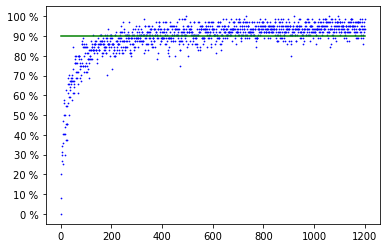

In [30]:
plt.scatter(list(range(epochs+1)), accuracies1, s=0.5, color="blue")#s=1
yticks = [str(i)+" %" for i in range(0,101,10)]
plt.yticks(list(range(0,101,10)), yticks)
plt.scatter([0],[100], s=0.000001)
plt.plot([0,1202],[90,90], color="green")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

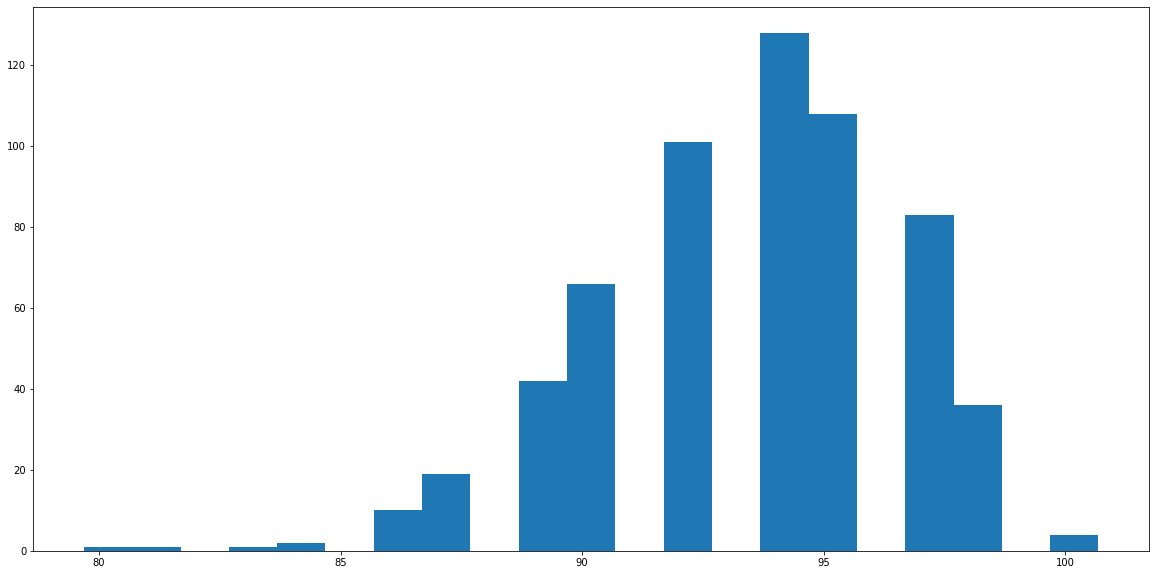

In [31]:
accuracies1_late = np.array(accuracies1[600:])
plt.hist(accuracies1_late, bins=np.arange(accuracies1_late.min(), accuracies1_late.max()+1))
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [32]:
print(f"moyenne: {accuracies1_late.mean(): .2f}%    | std:{accuracies1_late.std(): .2f}%")

moyenne:  93.43%    | std: 3.10%


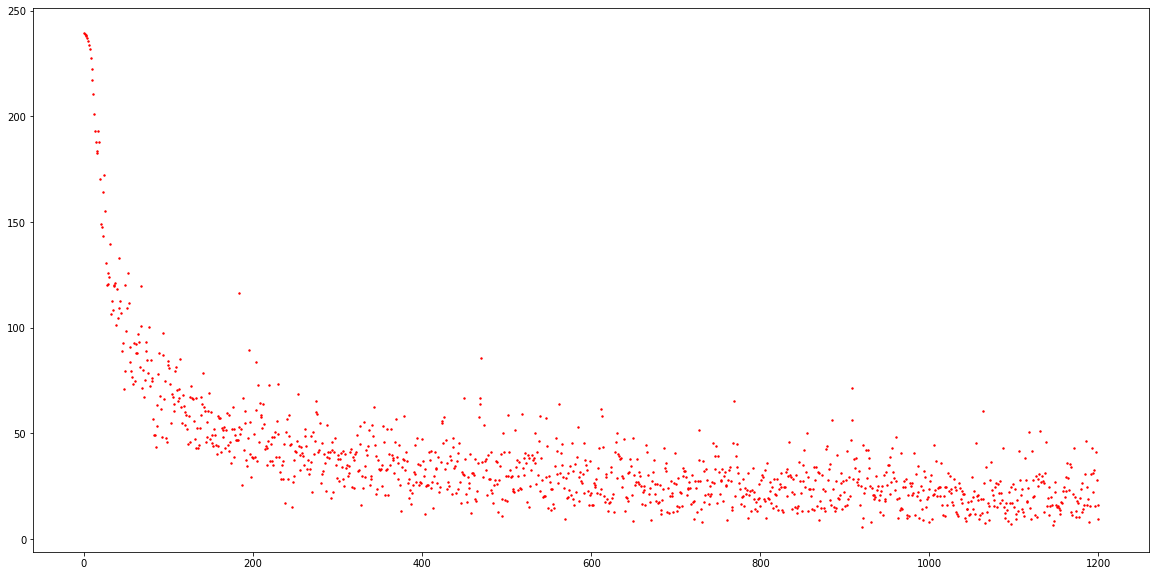

In [33]:
plt.scatter(list(range(epochs)), costs1, color="red", s=2)
plt.show()

In [34]:
#del nn, layers

### 5.2 Entrainement sur mini-batch, Test sur tout le data-set

In [35]:
SCE2 = SoftmaxCrossEntropyLoss()
layers2 = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE2)]
nn2 = NeuralNetwork(layers2)

In [36]:
%%time
accuracies2, costs2 = train_on_subset(nn2, "./EMNIST_DATA_SET/", epochs=epochs, 
                                      batch_size=64, equilibrium=True, lr=1, 
                                      test_on_all=True, iter_test=20)

Iteration:    0 | Accuracy: 21.700520833333332 %
Iteration:   20 | Accuracy: 60.5234375 %
Iteration:   40 | Accuracy: 60.8671875 %
Iteration:   60 | Accuracy: 71.19791666666667 %
Iteration:   80 | Accuracy: 79.48697916666667 %
Iteration:  100 | Accuracy: 83.1875 %
Iteration:  120 | Accuracy: 83.4296875 %
Iteration:  140 | Accuracy: 81.50260416666667 %
Iteration:  160 | Accuracy: 85.99479166666667 %
Iteration:  180 | Accuracy: 84.2109375 %
Iteration:  200 | Accuracy: 87.32291666666667 %
Iteration:  220 | Accuracy: 87.62760416666667 %
Iteration:  240 | Accuracy: 87.50260416666667 %
Iteration:  260 | Accuracy: 88.64322916666667 %
Iteration:  280 | Accuracy: 88.34375 %
Iteration:  300 | Accuracy: 90.0625 %
Iteration:  320 | Accuracy: 89.36197916666667 %
Iteration:  340 | Accuracy: 90.05208333333333 %
Iteration:  360 | Accuracy: 89.67708333333333 %
Iteration:  380 | Accuracy: 88.7734375 %
Iteration:  400 | Accuracy: 90.6953125 %
Iteration:  420 | Accuracy: 90.69270833333333 %
Iteration:  44

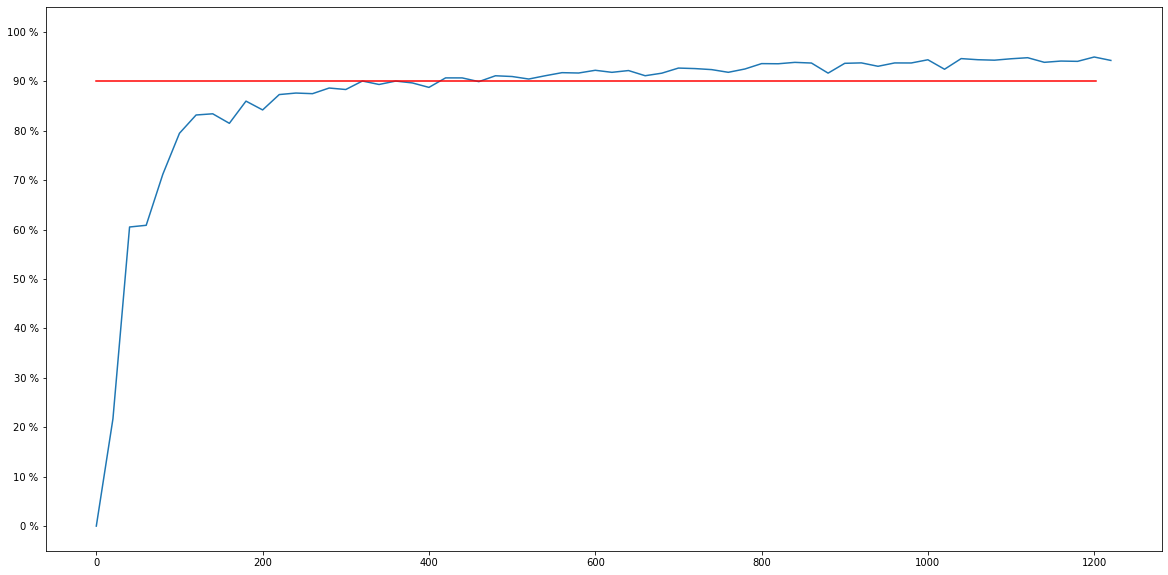

In [37]:
#print(len(range(0,epochs,20)))
plt.plot(list(range(0, epochs+20, 20)), accuracies2)#s=1
yticks = [str(i)+" %" for i in range(0,101,10)]
plt.yticks(list(range(0,101,10)), yticks)
plt.scatter([0],[100], s=0.000001)
plt.plot([0,epochs+1],[90,90], color="red")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

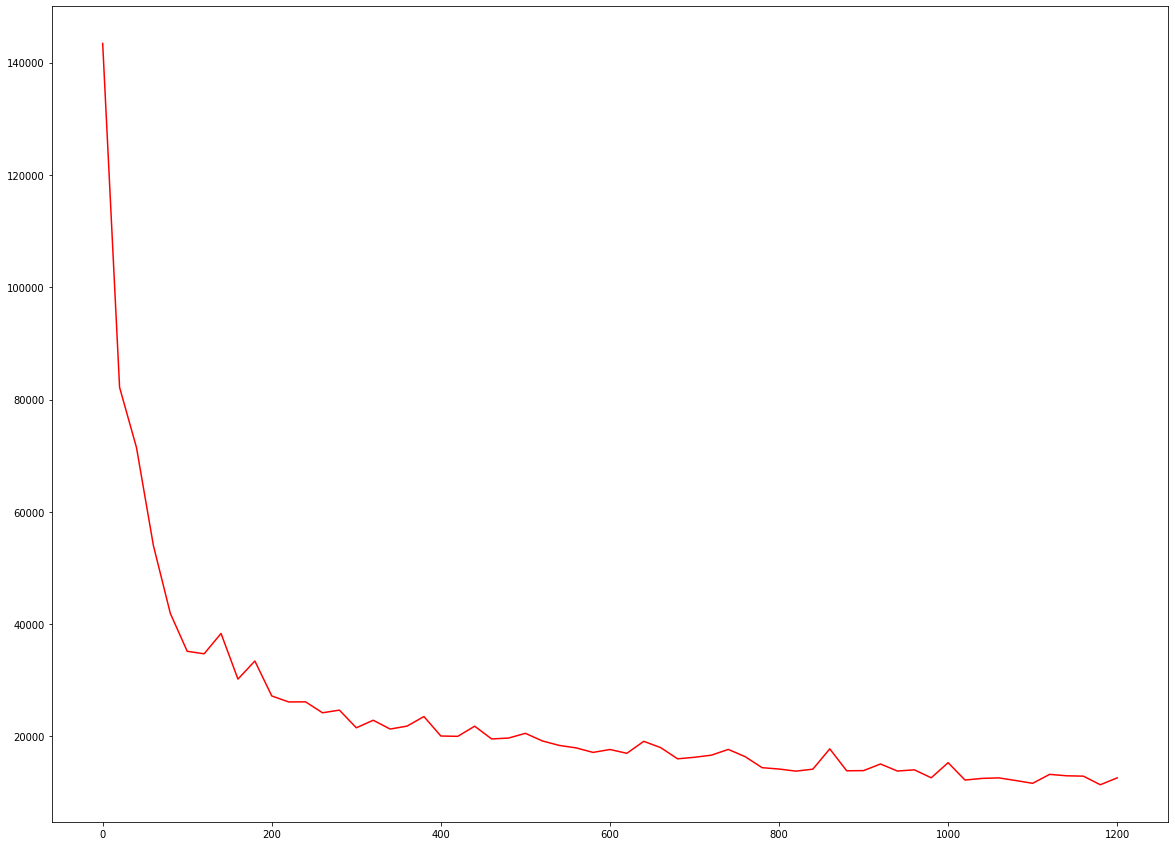

In [38]:
plt.plot(list(range(0,epochs, 20)), costs2, color="red")#, s=4
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

### 6. Exemple concret

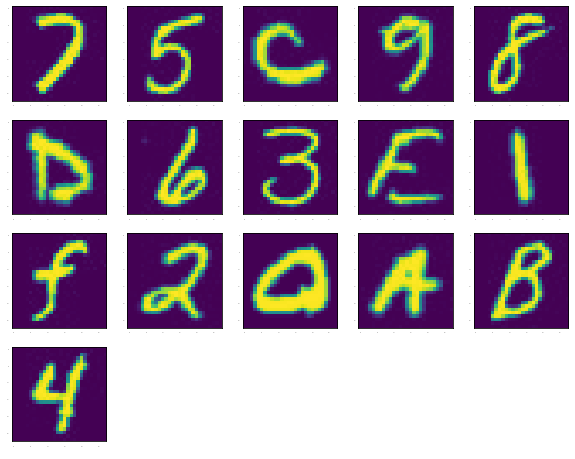

In [39]:
batch = make_random_batch("./EMNIST_DATA_SET/", 16, CLASSES, equilibrium=True)
imgs = [load_pil_image(f) for f in batch]
l = image_grid(imgs, titles=[" "]*len(batch))
l

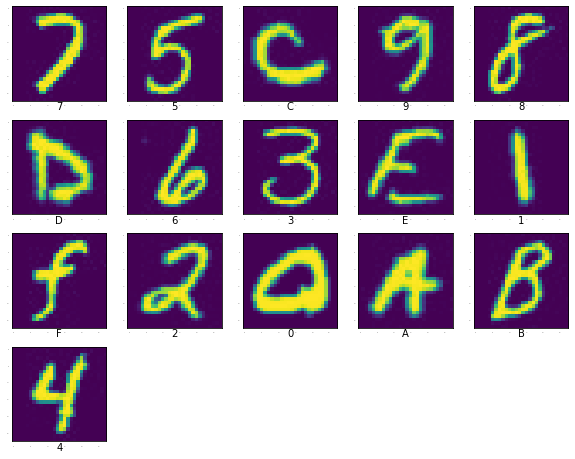

In [40]:
res = []
for i in range(len(batch)): 
    x, im = load_prediction_image(batch[i])
    p = nn2.forward(x)
    res.append(predicted_labels(p)[0])
image_grid(imgs, titles=res)
#print(res)

sauvegarde du models

In [41]:
import pickle


## 7. Applications

68 74 74 70 73 3A 2F 2F 79 6F 75 74 75 2E 62 65 2F 64 51 77 34 77 39 57 67 58 63 51 3F 74 3D 34 32

https://youtu.be/dQw4w9WgXcQ?t=42

## 8. Ouverture et extensions possibles

Utile mais pas encore note

In [42]:
print(inspect.getsource(load_pil_image))

def load_pil_image(str_path: str) -> Image:
    """
        Returns a grayscale PIL image given the full relative str_path
        @param: str_path: the full relative str_path to the image file
        @return: im: a PIL Image object (single channel: grayscale)
    """
    temp = Image.open(str_path)
    if "F" in str_path:
        im = temp.rotate(180)
    else:
        im = temp.rotate(270)
    temp.close()
    im = ImageOps.grayscale(im)
    return im

